In [4]:
#importing required python libraries and matplotlib for plotting and visualization
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [5]:
def makeSimplePlot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def makePlot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [6]:
data=pd.read_csv("religion.csv")
data

,promney,rfrac
0,0.047790,0.000000
1,0.051199,0.010000
2,0.054799,0.020000
3,0.058596,0.030000
4,0.062597,0.040000
5,0.066807,0.050000
6,0.071233,0.060000
7,0.075881,0.070000
8,0.080757,0.080000
9,0.085865,0.090000


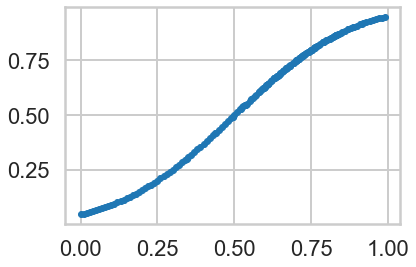

In [7]:
x=data.rfrac.values
y=data.promney.values
plt.plot(x,y,'.')

In [8]:
indexes=np.sort(np.random.choice(x.shape[0], size=30, replace=False))

In [9]:
samplex = x[indexes]
samplef = y[indexes]

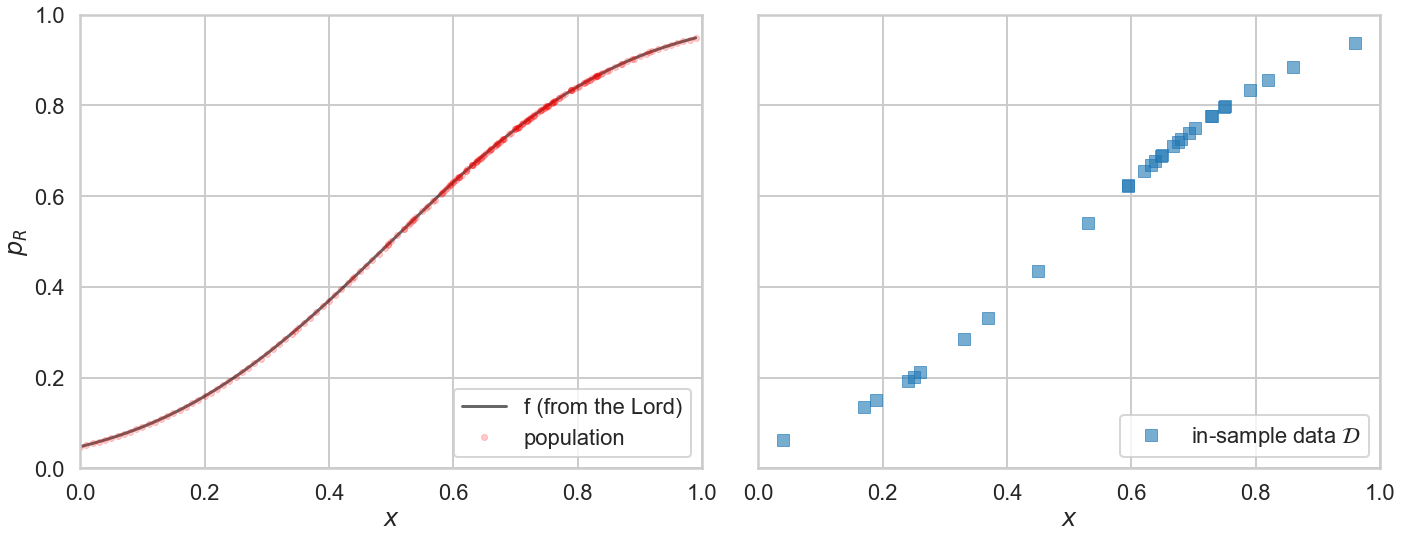

In [23]:
axes=makePlot()
axes[0].plot(x,y, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(x,y, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex,samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

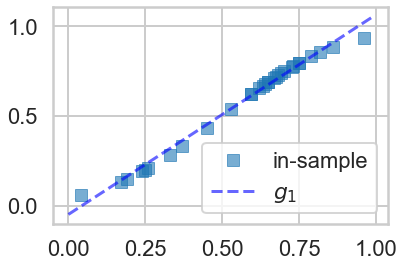

In [11]:
#best fit
g1 = np.poly1d(np.polyfit(x[indexes],y[indexes],1))
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

In [12]:
g20 = np.poly1d(np.polyfit(x[indexes],y[indexes],20))

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


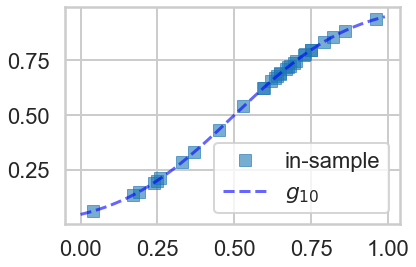

In [13]:
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g20(x), 'b--', alpha=0.6, label="$g_{10}$");
plt.legend(loc=4);

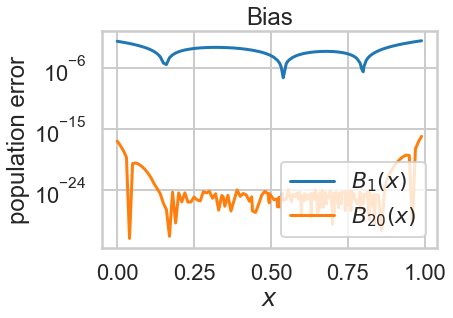

In [14]:
#Squaring makes sure that we are calculating a positive quantity.
plt.plot(x, (g1(x)-y)**2, lw=3, label="$B_1(x)$")
plt.plot(x, (g20(x)-y)**2, lw=3,label="$B_{20}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


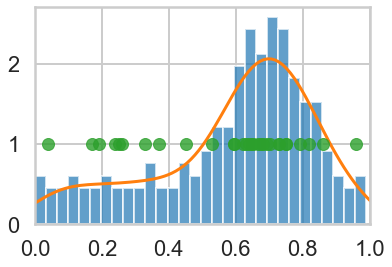

In [15]:
#role of sampling
plt.hist(x, normed=True, bins=30, alpha=0.7)
sns.kdeplot(x)
plt.plot(x[indexes], [1.0]*len(indexes),'o', alpha=0.8)
plt.xlim([0,1]);

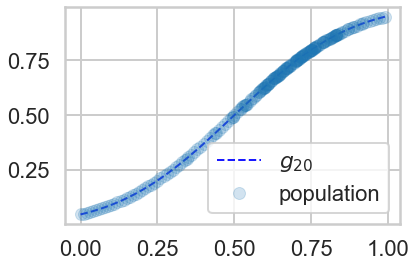

In [16]:
plt.plot(x,g20(x), 'b--', alpha=0.9, lw=2, label="$g_{20}$");
plt.plot(x,y, 'o', alpha=0.2, label="population");
plt.legend(loc=4);

In [17]:
#how noises will effect the process of learning
sigma=0.06
mask=(x > 0.65) & (x < 0.8)
sigmalist=sigma+mask*0.03

In [18]:
y1 = y + sp.stats.norm.rvs(scale=sigmalist, size=200)
#the next three lines just ensure that y1 remains a probability
yadd = (y1 < 0.0) *(0.01-y1)
ysub = (y1 > 1.0)*(y1 - 1.0)
y1 = y1 + yadd -ysub

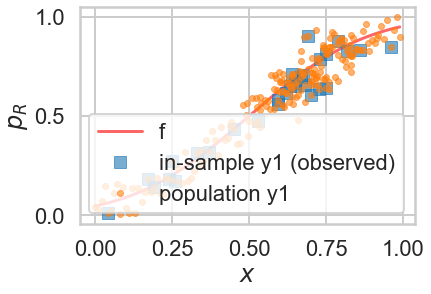

In [19]:
plt.plot(x,y, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y1[indexes], 's', alpha=0.6, label="in-sample y1 (observed)");
plt.plot(x, y1, '.', alpha=0.6, label="population y1");
plt.xlabel('$x$');
plt.ylabel('$p_R$')
plt.legend(loc=4);

In [22]:
#Fitting a noisy model: the complexity of your hypothesis
g1noisy = np.poly1d(np.polyfit(x[indexes],y1[indexes],1))
g20noisy = np.poly1d(np.polyfit(x[indexes],y1[indexes],20))

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


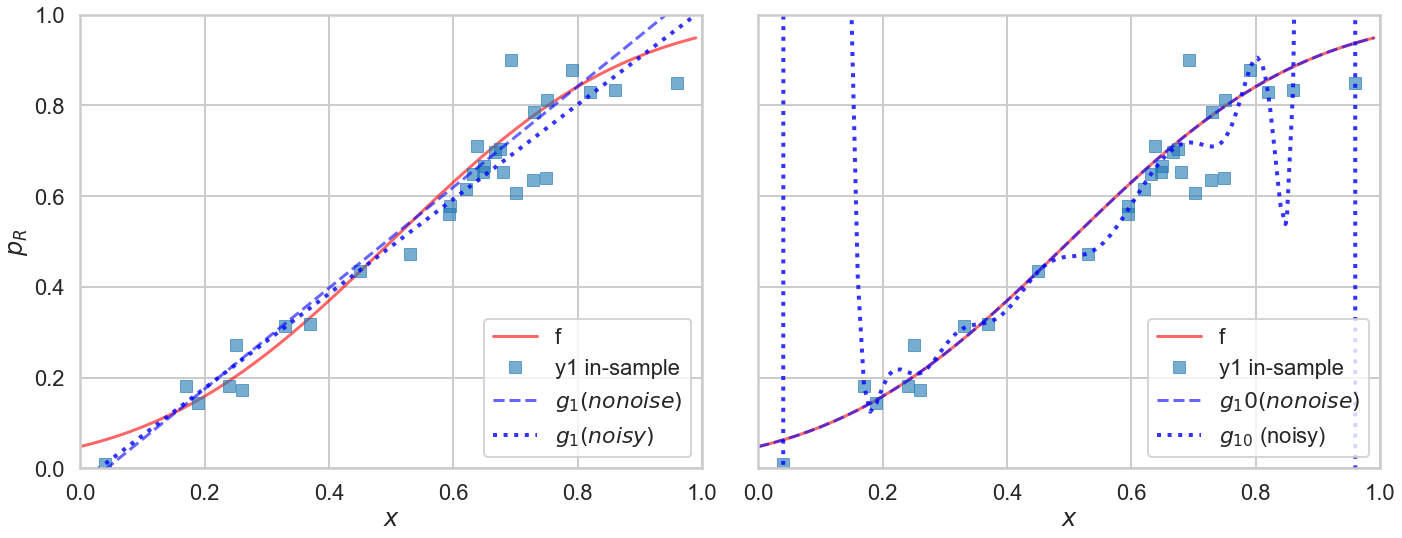

In [26]:
axes=makePlot()
axes[0].plot(x,y, 'r-', alpha=0.6, label="f");
axes[1].plot(x,y, 'r-', alpha=0.6, label="f");
axes[0].plot(x[indexes],y1[indexes], 's', alpha=0.6, label="y1 in-sample");
axes[1].plot(x[indexes],y1[indexes], 's', alpha=0.6, label="y1 in-sample");
axes[0].plot(x,g1(x),  'b--', alpha=0.6, label="$g_1 (no noise)$");
axes[0].plot(x,g1noisy(x), 'b:', lw=4, alpha=0.8, label="$g_1 (noisy)$");
axes[1].plot(x,g20(x),  'b--', alpha=0.6, label="$g_10 (no noise)$");
axes[1].plot(x,g20noisy(x), 'b:', lw=4, alpha=0.8, label="$g_{10}$ (noisy)");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

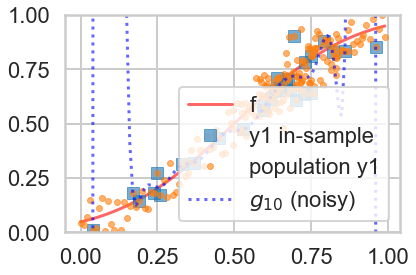

In [29]:
#figure on the left we can observe that due to noise the best fit line is changed slightly
plt.plot(x,y, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes],y1[indexes], 's', alpha=0.6, label="y1 in-sample");
plt.plot(x,y1,  '.', alpha=0.6, label="population y1");
plt.plot(x,g20noisy(x), 'b:', alpha=0.6, label="$g_{10}$ (noisy)");
plt.ylim([0,1])
plt.legend(loc=4);

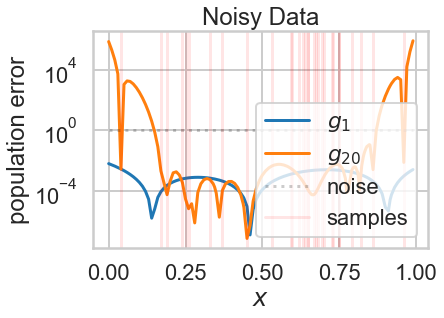

In [31]:
#overfitting refers to fitting the noise to the model. Further we have to ensure that the model does not fit the noise
plt.plot(x, ((g1noisy(x)-y)**2), lw=3, label="$g_1$")
plt.plot(x, ((g20noisy(x)-y)**2), lw=3,label="$g_{20}$");
plt.plot(x, [1]*x.shape[0], "k:", label="noise", alpha=0.2);
for i in indexes[:-1]:
    plt.axvline(x[i], 0, 1, color='r', alpha=0.1)
plt.axvline(x[indexes[-1]], 0, 1, color='r', alpha=0.1, label="samples")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Noisy Data");

In [32]:
#variance of the model
def gen(degree, nsims, size, x, out):
    outpoly=[]
    for i in range(nsims):
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        pc=np.polyfit(x[indexes], out[indexes], degree)
        p=np.poly1d(pc)
        outpoly.append(p)
    return outpoly

In [33]:
polys1 = gen(1, 200, 30,x, y1);
polys20 = gen(20, 200, 30,x, y1);

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit 

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


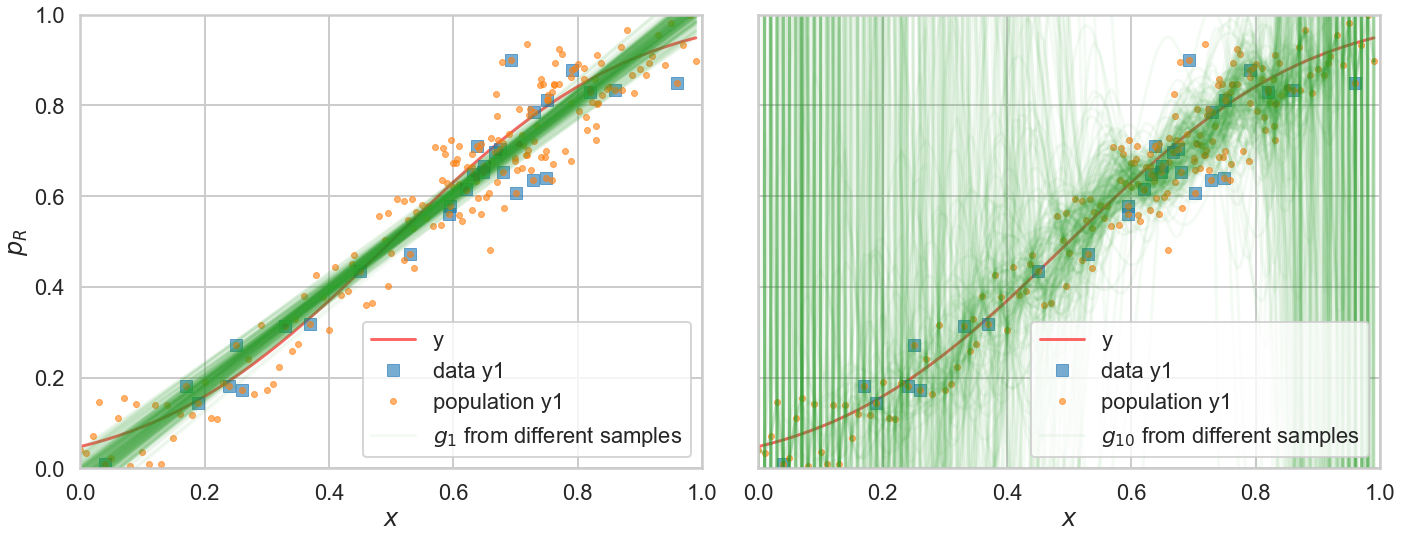

In [38]:
axes=makePlot()
axes[0].plot(x,y, 'r-', lw=3, alpha=0.6, label="y");
axes[1].plot(x,y, 'r-', lw=3, alpha=0.6, label="y");
axes[0].plot(x[indexes], y1[indexes], 's', alpha=0.6, label="data y1");
axes[1].plot(x[indexes], y1[indexes], 's', alpha=0.6, label="data y1");
axes[0].plot(x, y1, '.', alpha=0.6, label="population y1");
axes[1].plot(x, y1, '.', alpha=0.6, label="population y1");
c=sns.color_palette()[2]
for i,p in enumerate(polys1[:-1]):
    axes[0].plot(x,p(x), alpha=0.05, c=c)
axes[0].plot(x,polys1[-1](x), alpha=0.05, c=c,label="$g_1$ from different samples")
for i,p in enumerate(polys20[:-1]):
    axes[1].plot(x,p(x), alpha=0.05, c=c)
axes[1].plot(x,polys20[-1](x), alpha=0.05, c=c, label="$g_{10}$ from different samples")
axes[0].legend(loc=4);
axes[1].legend(loc=4);

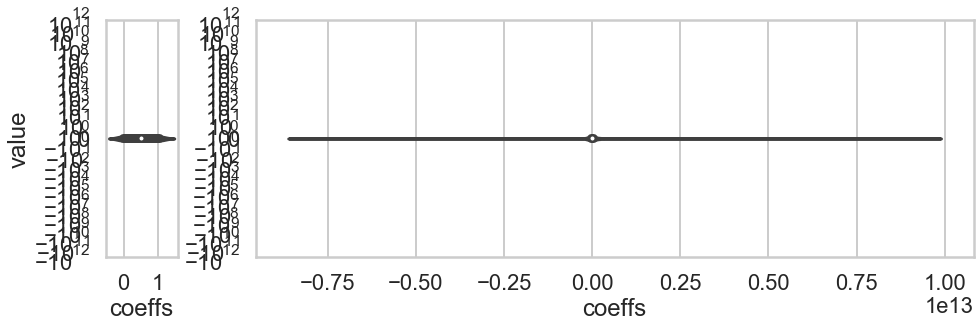

In [40]:
#plotting the coefficients of the fit
pdict1={}
pdict20={}
for i in reversed(range(2)):
    pdict1[i]=[]
    for j, p in enumerate(polys1):
        pdict1[i].append(p.c[i])
for i in reversed(range(21)):
    pdict20[i]=[]
    for j, p in enumerate(polys20):
        pdict20[i].append(p.c[i]) 
df1=pd.DataFrame(pdict1)
df20=pd.DataFrame(pdict20)
fig = plt.figure(figsize=(14, 5)) 
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 10]) 
axes = [plt.subplot(gs[0]), plt.subplot(gs[1])]
axes[0].set_ylabel("value")
axes[0].set_xlabel("coeffs")
axes[1].set_xlabel("coeffs")
plt.tight_layout();
sns.violinplot(df1, ax=axes[0]);
sns.violinplot(df20, ax=axes[1]);
axes[0].set_yscale("symlog");
axes[1].set_yscale("symlog");
axes[0].set_ylim([-1e12, 1e12]);
axes[1].set_ylim([-1e12, 1e12]);

In [42]:
#testing and training
tt=pd.DataFrame(dict(x=x[indexes],y=y[indexes],y1=y1[indexes]))

In [46]:
from sklearn.model_selection import train_test_split
datasize=tt.shape[0]
itrain,itest = train_test_split(range(30),train_size=24, test_size=6)
xtrain= tt.x[itrain].values
ftrain = tt.y[itrain].values
ytrain = tt.y1[itrain].values
xtest= tt.x[itest].values
ftest = tt.y[itest].values
ytest = tt.y1[itest].values

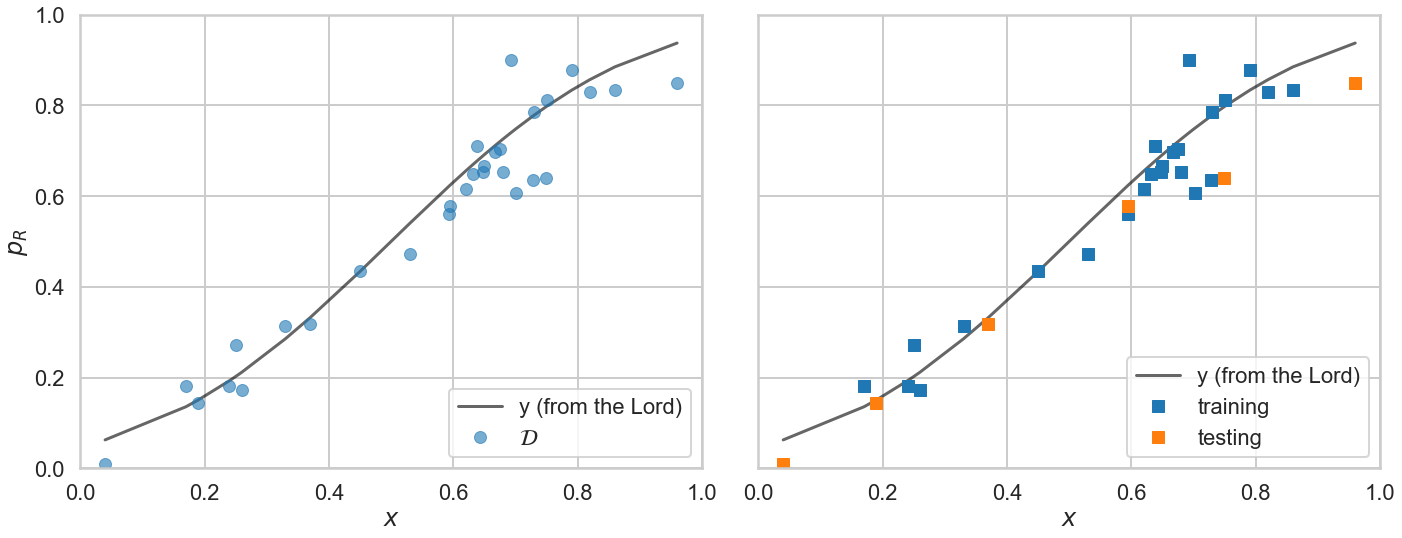

In [49]:
axes=makePlot()
axes[0].plot(tt.x,tt.y, 'k-', alpha=0.6, label="y (from the Lord)");
axes[0].plot(tt.x,tt.y1, 'o',alpha=0.6, label="$\cal{D}$");
axes[1].plot(tt.x,tt.y, 'k-', alpha=0.6, label="y (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower right")

In [50]:
#A short digression about scikit-learn
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(3).fit_transform([[1],[2], [3]])

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [51]:
#reshaping
np.array([1,2,3]).reshape(-1,1)

array([[1],
       [2],
       [3]])

In [53]:
xtrain

array([0.62      , 0.67438375, 0.7290476 , 0.7276294 , 0.75      ,
       0.70159191, 0.26      , 0.81958818, 0.59377226, 0.33      ,
       0.68028873, 0.53      , 0.24      , 0.86      , 0.45      ,
       0.25      , 0.63793494, 0.69278797, 0.65      , 0.66721109,
       0.17      , 0.7902686 , 0.63166321, 0.64832591])

In [54]:
#processing to transform our 1-D dataset x into a d-dimensional one
xtrain.reshape(-1,1)

array([[0.62      ],
       [0.67438375],
       [0.7290476 ],
       [0.7276294 ],
       [0.75      ],
       [0.70159191],
       [0.26      ],
       [0.81958818],
       [0.59377226],
       [0.33      ],
       [0.68028873],
       [0.53      ],
       [0.24      ],
       [0.86      ],
       [0.45      ],
       [0.25      ],
       [0.63793494],
       [0.69278797],
       [0.65      ],
       [0.66721109],
       [0.17      ],
       [0.7902686 ],
       [0.63166321],
       [0.64832591]])

In [55]:
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1,1))

array([[1.        , 0.62      , 0.3844    ],
       [1.        , 0.67438375, 0.45479344],
       [1.        , 0.7290476 , 0.53151041],
       [1.        , 0.7276294 , 0.52944455],
       [1.        , 0.75      , 0.5625    ],
       [1.        , 0.70159191, 0.49223121],
       [1.        , 0.26      , 0.0676    ],
       [1.        , 0.81958818, 0.67172479],
       [1.        , 0.59377226, 0.35256549],
       [1.        , 0.33      , 0.1089    ],
       [1.        , 0.68028873, 0.46279276],
       [1.        , 0.53      , 0.2809    ],
       [1.        , 0.24      , 0.0576    ],
       [1.        , 0.86      , 0.7396    ],
       [1.        , 0.45      , 0.2025    ],
       [1.        , 0.25      , 0.0625    ],
       [1.        , 0.63793494, 0.40696098],
       [1.        , 0.69278797, 0.47995517],
       [1.        , 0.65      , 0.4225    ],
       [1.        , 0.66721109, 0.44517064],
       [1.        , 0.17      , 0.0289    ],
       [1.        , 0.7902686 , 0.62452446],
       [1.

In [57]:
#creating multiple datasets one for each polynomial degree
def makeFeatures(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

In [59]:
#error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
degrees=range(21)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))
traintestlists=makeFeatures(xtrain, xtest, degrees)

In [60]:
traintestlists[3]['train']

array([[1.        , 0.62      , 0.3844    , 0.238328  ],
       [1.        , 0.67438375, 0.45479344, 0.30670531],
       [1.        , 0.7290476 , 0.53151041, 0.38749639],
       [1.        , 0.7276294 , 0.52944455, 0.38523942],
       [1.        , 0.75      , 0.5625    , 0.421875  ],
       [1.        , 0.70159191, 0.49223121, 0.34534544],
       [1.        , 0.26      , 0.0676    , 0.017576  ],
       [1.        , 0.81958818, 0.67172479, 0.5505377 ],
       [1.        , 0.59377226, 0.35256549, 0.20934361],
       [1.        , 0.33      , 0.1089    , 0.035937  ],
       [1.        , 0.68028873, 0.46279276, 0.3148327 ],
       [1.        , 0.53      , 0.2809    , 0.148877  ],
       [1.        , 0.24      , 0.0576    , 0.013824  ],
       [1.        , 0.86      , 0.7396    , 0.636056  ],
       [1.        , 0.45      , 0.2025    , 0.091125  ],
       [1.        , 0.25      , 0.0625    , 0.015625  ],
       [1.        , 0.63793494, 0.40696098, 0.25961463],
       [1.        , 0.69278797,

In [61]:
ytrain

array([0.61490414, 0.70458226, 0.78543367, 0.63645401, 0.81082187,
       0.60664156, 0.17156485, 0.82944787, 0.56042701, 0.31346135,
       0.65406669, 0.47319196, 0.18160111, 0.8344497 , 0.43476395,
       0.27284064, 0.71052396, 0.90109854, 0.66677913, 0.69788084,
       0.18110964, 0.87773937, 0.6493932 , 0.65232591])

In [62]:
traintestlists[3]['test']

array([[1.00000000e+00, 3.70000000e-01, 1.36900000e-01, 5.06530000e-02],
       [1.00000000e+00, 9.60000000e-01, 9.21600000e-01, 8.84736000e-01],
       [1.00000000e+00, 1.90000000e-01, 3.61000000e-02, 6.85900000e-03],
       [1.00000000e+00, 7.48654834e-01, 5.60484060e-01, 4.19609101e-01],
       [1.00000000e+00, 4.00000000e-02, 1.60000000e-03, 6.40000000e-05],
       [1.00000000e+00, 5.95162068e-01, 3.54217887e-01, 2.10817050e-01]])

In [63]:
ytest

array([0.31903814, 0.84990203, 0.14427194, 0.63946802, 0.01      ,
       0.57894188])

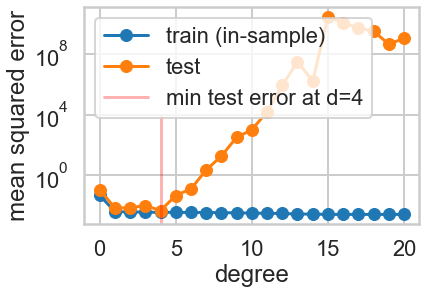

In [66]:
#how errors change with the degree of the polynomial
for d in degrees:
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    #setting up model
    est = LinearRegression()
    #fitting the model
    est.fit(Xtrain, ytrain)
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    error_train[d] = mean_squared_error(ytrain, prediction_on_training)
    error_test[d] = mean_squared_error(ytest, prediction_on_test)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

3

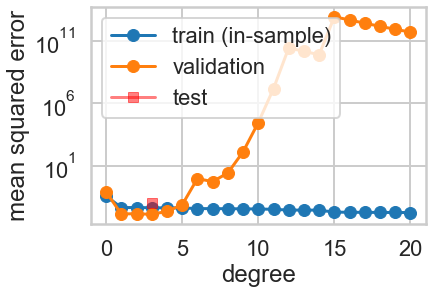

In [71]:
#validation
#splitting the training set further
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= tt.x[intrain].values
fntrain = tt.y[intrain].values
yntrain = tt.y1[intrain].values
xnvalid= tt.x[invalid].values
fnvalid = tt.y[invalid].values
ynvalid = tt.y1[invalid].values
degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=makeFeatures(xntrain, xnvalid, degrees)

for d in degrees:
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))
mindeg = np.argmin(error_valid) 
ttlist=makeFeatures(xtrain, xtest, degrees)
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain)
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
mindeg

4

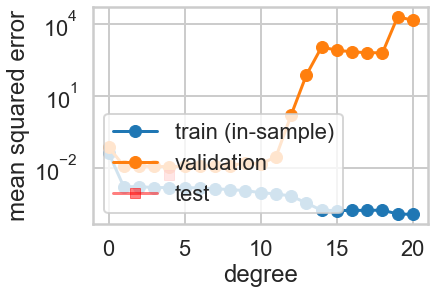

In [77]:
#choosing a new random split between training and validation data
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= tt.x[intrain].values
fntrain = tt.y[intrain].values
yntrain = tt.y1[intrain].values
xnvalid= tt.x[invalid].values
fnvalid = tt.y[invalid].values
ynvalid = tt.y1[invalid].values
degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=makeFeatures(xntrain, xnvalid, degrees)

for d in degrees:
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))
mindeg = np.argmin(error_valid)
ttlist=makeFeatures(xtrain, xtest, degrees)
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain)
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.yscale("log")
mindeg

In [81]:
#cross validation
from sklearn.model_selection import KFold
n_folds=4
degrees=range(21)
results=[]
fold = KFold(n_folds,shuffle=False)
for d in degrees:
    hypothesisresults=[]
    for train, test in fold.split(xtrain):
        tvlist=makeFeatures(xtrain[train], xtrain[test], degrees)
        clf = LinearRegression()
        clf.fit(tvlist[d]['train'], ytrain[train]) # fit
        hypothesisresults.append(mean_squared_error(ytrain[test], clf.predict(tvlist[d]['test'])))
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults)))

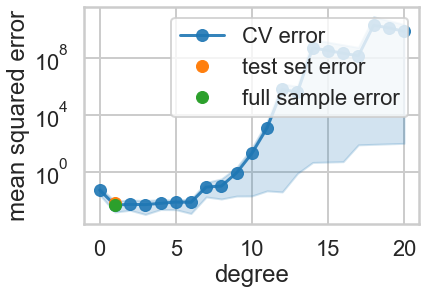

In [83]:
mindeg = np.argmin([r[0] for r in results])
ttlist=makeFeatures(xtrain, xtest, degrees)
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain)
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(pred, ytest)
errtr=mean_squared_error(ytrain, clf.predict(ttlist[mindeg]['train']))
errout=0.8*errtr+0.2*err
c0=sns.color_palette()[0]
plt.plot(degrees, [r[0] for r in results], marker='o', label='CV error', alpha=0.9)
plt.fill_between(degrees, [r[1] for r in results], [r[2] for r in results], color=c0, alpha=0.2)
plt.plot([mindeg], [err], 'o',  label='test set error')
plt.plot([mindeg], [errout], 'o',  label='full sample error')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

(100, 3)

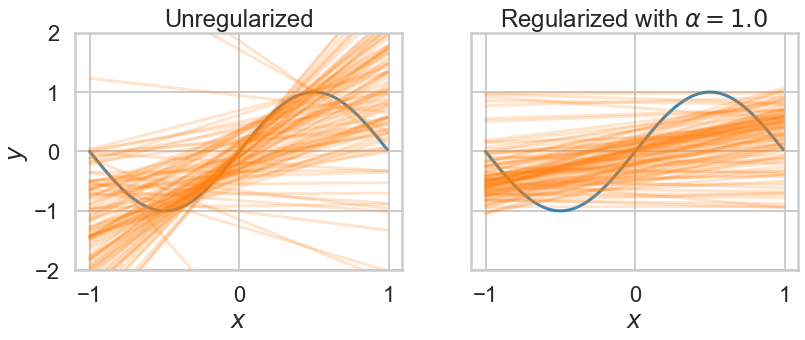

In [87]:
#regularization
xs=np.arange(-1.,1.,0.01)
ff = lambda x: np.sin(np.pi*x)
ffxs=ff(xs)
from sklearn.linear_model import Ridge
axes=makeSimplePlot()
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
axes[0].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
axes[1].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
from sklearn.linear_model import Ridge
D=np.empty((100,3), dtype="int")
for i in range(100):
    D[i,:] = np.random.choice(200, replace=False, size=3)
for i in range(100):
    choices = D[i,:]
    p1=np.polyfit(xs[choices], ffxs[choices],1)
    est = Ridge(alpha=1.0)
    est.fit(xs[choices].reshape(-1,1), ffxs[choices])
    axes[0].plot(xs, np.polyval(p1, xs), color=c1, alpha=0.2)
    axes[1].plot(xs, est.predict(xs.reshape(-1,1)), color=c1, alpha=0.2)
axes[0].set_title("Unregularized");
axes[1].set_title("Regularized with $\\alpha=1.0$");
D.shape

In [92]:
#Regularization of the Romney model with Cross-Validation
def plotFunctions(est, ax, df, alpha, xtest, Xtest, xtrain, ytrain):
    ax.plot(df.x, df.y, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", alpha=0.4)
    ax.plot(xtest, ytest, 's', label="testing", alpha=0.6)
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),  '.', label="alpha = %s" % str(alpha))
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')
    
def plotCoefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

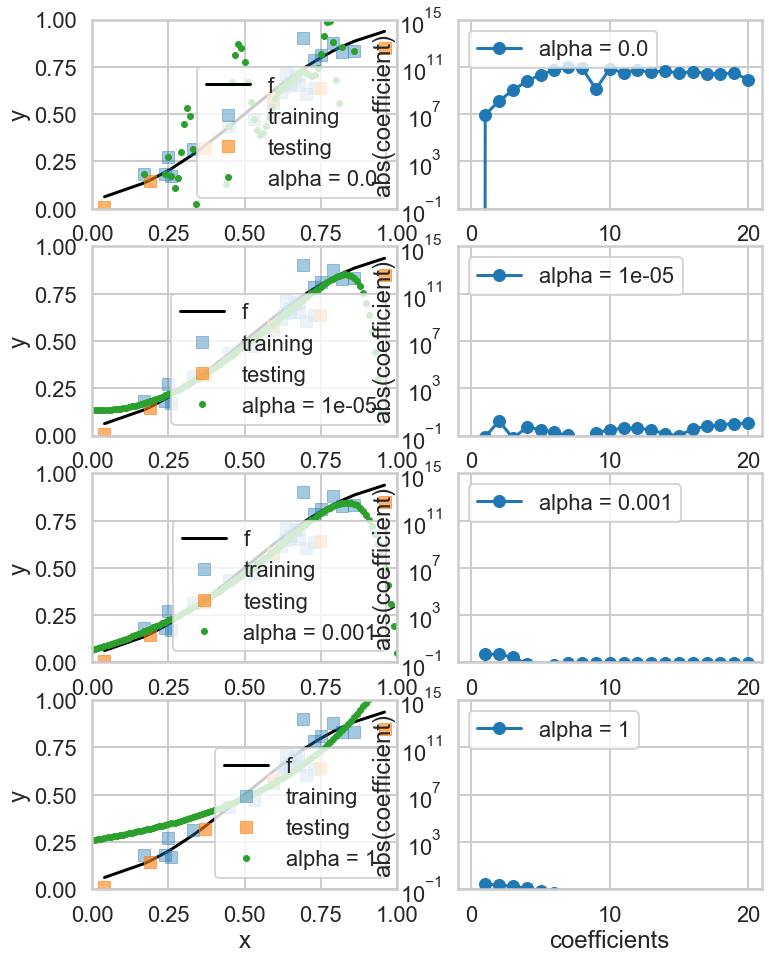

In [93]:
fig, rows = plt.subplots(4, 2, figsize=(12, 16))
d=20
alphas = [0.0, 1e-5, 1e-3, 1]
Xtrain = traintestlists[d]['train']
Xtest = traintestlists[d]['test']
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, ytrain)
    plotFunctions(est, l, tt, alpha, xtest, Xtest, xtrain, ytrain )
    plotCoefficients(est, r, alpha)

In [103]:
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.model_selection import GridSearchCV
def cv_optimize_ridge(X, y, n_folds=4):
    clf = Ridge()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [104]:
fitmodel = cv_optimize_ridge(Xtrain, ytrain, n_folds=4)

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [102]:
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

NameError: name 'fitmodel' is not defined

In [105]:
err=mean_squared_error(clf.predict(Xtest), ytest)
errtr=mean_squared_error(clf.predict(Xtrain), ytrain)
errout=0.8*errtr+0.2*err

ValueError: shapes (6,21) and (2,) not aligned: 21 (dim 1) != 2 (dim 0)